In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Load the CSV data file into a Pandas DataFrame

In [4]:
df = pd.read_csv('Stores.csv')

In [6]:
df.head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


### Report Stores that have more than $100k in Sales

In [8]:
df.sort_values('Store_Sales',ascending=False).iloc[:5]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820


In [12]:
df[df['Store_Sales'] > 100000]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
408,409,1303,1587,1310,102310
432,433,1365,1638,680,102920
557,558,1137,1374,700,101780
649,650,1989,2414,860,116320
758,759,1486,1758,820,101820
866,867,1565,1854,900,100900
868,869,1775,2104,980,105150


### Create a new feature column of ratio between the Sales and Area of a store

In [20]:
df['Sales_Area'] = np.round(df['Store_Sales']/df['Store_Area'],2)

### Create a Visual Report of Sales using a Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

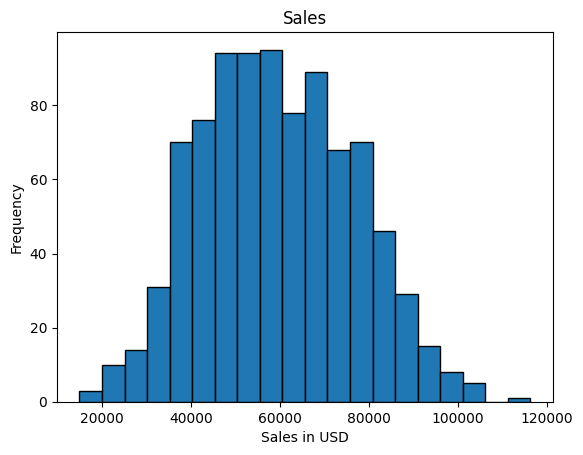

In [36]:
plt.hist(df['Store_Sales'],bins=20,edgecolor='black')
plt.title('Sales')
plt.xlabel('Sales in USD')
plt.ylabel('Frequency')
plt.show

### Create Visual Report of Feature Correlation using a Heatmap

In [37]:
corr_m = df.corr()

<AxesSubplot:>

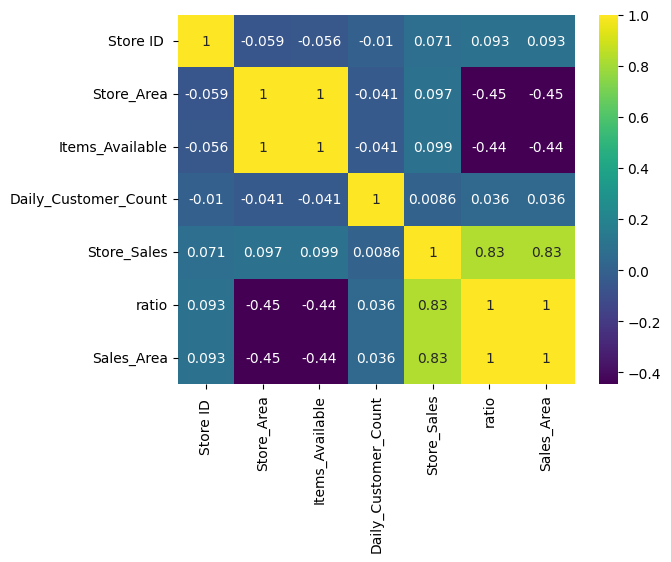

In [47]:
sns.heatmap(corr_m,annot=True,cmap='viridis')

### Split Data into a Training Set and a Test Set

In [55]:
X = df.drop(['Store ID ','Store_Sales'],axis=1)

In [56]:
y = df['Store_Sales']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Create a Linear Regression Model to Forecast Sales Column

In [61]:
model = LinearRegression()

In [63]:
model.fit(X_train,y_train)

LinearRegression()

In [66]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
Store_Area,44.033066
Items_Available,-3.276701
Daily_Customer_Count,-0.497550
ratio,678.326459
Sales_Area,678.326459


### Evaluate Forecast Results using Regression Metrics

In [69]:
predictions = model.predict(X_test)

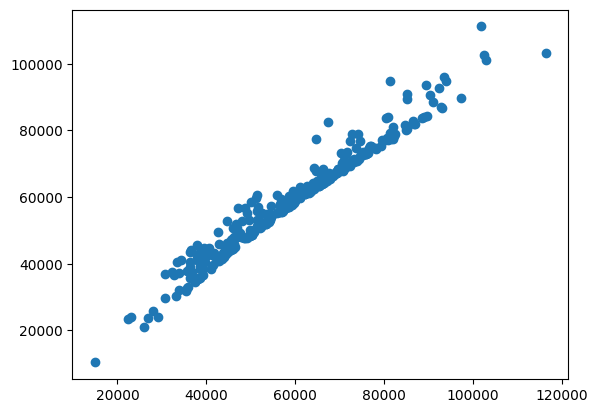

In [72]:
plt.scatter(y_test, predictions)
plt.show()

In [74]:
mae = metrics.mean_absolute_error(y_test, predictions)

In [77]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [78]:
mae

2490.3258913059517

In [79]:
rmse

3396.206618118929

In [85]:
df['Store_Sales'].describe()

count       896.000000
mean      59351.305804
std       17190.741895
min       14920.000000
25%       46530.000000
50%       58605.000000
75%       71872.500000
max      116320.000000
Name: Store_Sales, dtype: float64

The RMSE should be compared relative to the mean of the sales to understand the magnitude. If the goal is to understand which factors are most predictive of sales, a slightly higher RMSE might be acceptable. If the model is being used to make financial decisions, a lower RMSE might be necessary.